<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/The%20Basics/naive_bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install mxnet

Importing Libraries

In [0]:
import mxnet as mx
from mxnet import nd
import numpy as np

from matplotlib import pyplot as plt
from IPython import display

%matplotlib inline
display.set_matplotlib_formats('svg')

Optical Character Recognition

In [0]:
# We go over one observation at a time (speed doesn't matter here)
def transform(data, label):
    return (nd.floor(data/128)).astype(np.float32), label.astype(np.float32)

mnist_train = mx.gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test  = mx.gluon.data.vision.MNIST(train=False, transform=transform)

# Initialize the counters
xcount = nd.ones((784,10))
ycount = nd.ones((10))

for data, label in mnist_train:
    y = int(label)
    ycount[y] += 1
    xcount[:,y] += data.reshape((784))

# using broadcast again for division
py = ycount / ycount.sum()
px = (xcount / ycount.reshape(1,10))

In [4]:
print(py)


[0.09871688 0.11236461 0.09930012 0.10218297 0.09736711 0.09035161
 0.09863356 0.10441593 0.09751708 0.09915014]
<NDArray 10 @cpu(0)>


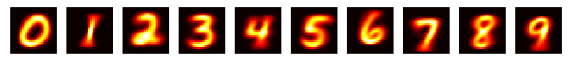

Class probabilities 
[0.09871688 0.11236461 0.09930012 0.10218297 0.09736711 0.09035161
 0.09863356 0.10441593 0.09751708 0.09915014]
<NDArray 10 @cpu(0)>


In [5]:
# plotting the probabilities that we found above
import matplotlib.pyplot as plt
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)

plt.show()
print('Class probabilities', py)

In [6]:
# Get the first test item
data, label = mnist_test[0]
data = data.reshape((784,1))

# Compute the per pixel conditional probabilities
xprob = (px * data + (1-px) * (1-data))
# Take the product
xprob = xprob.prod(0) * py
print('Unnormalized Probabilities', xprob)
# Normalize
xprob = xprob / xprob.sum()
print('Normalized Probabilities', xprob)
# we are multiplying 0.001 to 1 ranging numbers 784 times hence this will be leading to zero

Unnormalized Probabilities 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>
Normalized Probabilities 
[nan nan nan nan nan nan nan nan nan nan]
<NDArray 10 @cpu(0)>


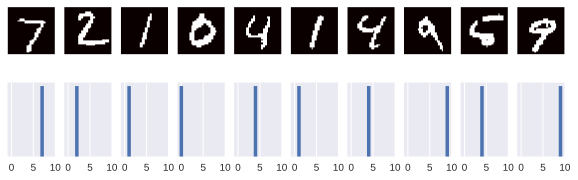

In [7]:
logpx = nd.log(px)
logpxneg = nd.log(1-px)
logpy = nd.log(py)

def bayespost(data):
    # We need to incorporate the prior probability p(y) since p(y|x) is
    # proportional to p(x|y) p(y)
    logpost = logpy.copy()
    logpost += (logpx * data + logpxneg * (1-data)).sum(0)
    # Normalize to prevent overflow or underflow by subtracting the largest
    # value
    logpost -= nd.max(logpost)
    # Compute the softmax using logpx
    # Softmax is used to map the non-normalized output of a network to a probability distribution over predicted output classes (Generally 0 to 1). 
    post = nd.exp(logpost).asnumpy()
    post /= np.sum(post)
    return post
  
fig, figarr = plt.subplots(2, 10, figsize=(10, 3))

# Show 10 images
ctr = 0
for data, label in mnist_test:
    x = data.reshape((784,1))
    y = int(label)

    post = bayespost(x)

    # Bar chart and image of digit
    figarr[1, ctr].bar(range(10), post)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1

    if ctr == 10:
        break

plt.show()

In [8]:
# Initialize counter
ctr = 0
err = 0

for data, label in mnist_test:
    ctr += 1
    x = data.reshape((784,1))
    y = int(label)

    post = bayespost(x)
    if (post[y] < post.max()):
        err += 1

print('Naive Bayes has an error rate of', err/ctr)

Naive Bayes has an error rate of 0.1574


Exercises

In [0]:
# 1. Need to come up with a dataset and apply Naive Bayes for real valued outputs

In [0]:
# 2. Naive Bayes works if there is conditional independence or no correlation between the inputs

In [11]:
# 3
ycount = nd.zeros((5))
for i in range(50000):
  y = nd.random.randint(0, 5)
  t = ycount[y]
  ycount += 0.1
  ycount[y] = t + 0.9
  
py = ycount / ycount.sum()
print(py)

ycount = nd.zeros((50))
for i in range(50000):
  y = nd.random.randint(0, 50)
  t = ycount[y]
  ycount += 0.1
  ycount[y] = t + 0.9
  
py = ycount / ycount.sum()
print(py)

# observe the distribution of probabilities of each suspect in both the cases


[0.1992127  0.20047998 0.20033297 0.19870839 0.201266  ]
<NDArray 5 @cpu(0)>

[0.01999451 0.02006888 0.02007448 0.01981796 0.01990346 0.01994755
 0.01995316 0.01995027 0.02006632 0.02003594 0.01991722 0.01999172
 0.02002762 0.02001102 0.02000554 0.02001651 0.0200386  0.02018758
 0.02001096 0.02007169 0.02014062 0.01982895 0.02004138 0.01994208
 0.01977392 0.0198042  0.01979594 0.01992286 0.01996139 0.02012962
 0.0200689  0.02011039 0.01995592 0.02006886 0.02001382 0.02001926
 0.02000272 0.01992281 0.02005243 0.01991173 0.02006891 0.02004137
 0.02013238 0.01998077 0.02002205 0.0200137  0.02008279 0.01990889
 0.02007723 0.02011315]
<NDArray 50 @cpu(0)>
